# **프로젝트: SentencePiece 사용하기**

## **Step0. 단어사전용 데이터 전처리**
---

In [1]:
# !pip install konlpy
# !git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
# %cd Mecab-ko-for-Google-Colab/
# !bash install_mecab-ko_on_colab_light_220429.sh

In [2]:
import os

import matplotlib.pyplot as plt
import torch
import numpy as np

%matplotlib inline

In [3]:
import os
path_to_file = "korean-english-park.train.ko"

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


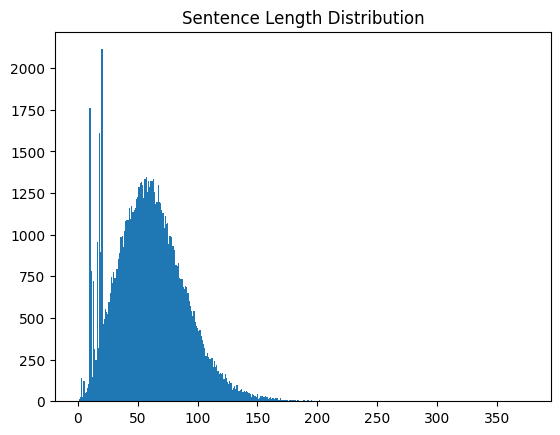

In [4]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [5]:
def check_sentence_with_length(raw, length):
    count = 0

    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [6]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [7]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


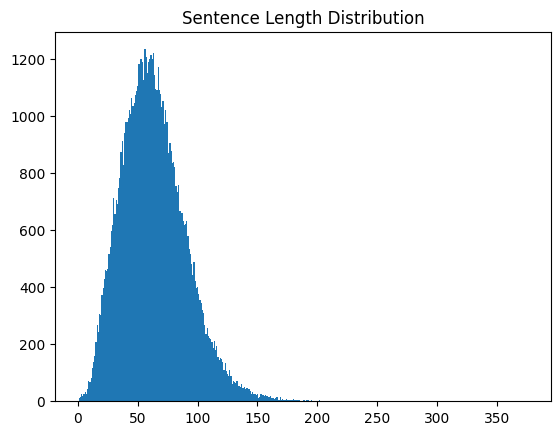

In [8]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

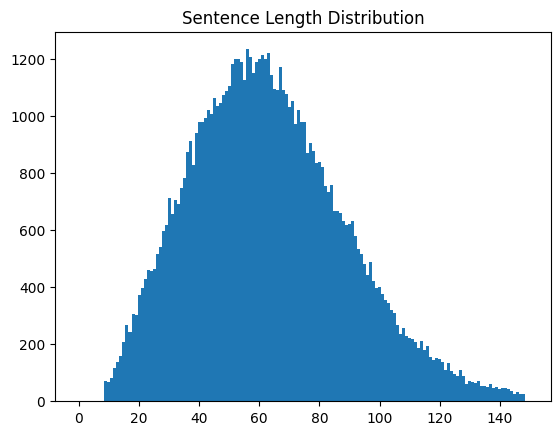

In [9]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [10]:
import torch
from torch.nn.utils.rnn import pad_sequence
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import konlpy

print(torch.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(konlpy.__version__)

2.10.0+cu128
1.26.3
3.10.8
0.6.0


In [11]:
import os

import matplotlib.pyplot as plt
import torch
import numpy as np

%matplotlib inline

In [12]:
# !wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
# !tar -xzvf korean-english-park.train.tar.gz

## **Step1. SentencePiece 설치하기**
---
#### SentencePiece
- SentencePiece는 Google에서 제공하는 오픈소스 기반 Sentence Tokenizer/Detokenizer 로서, BPE와 unigram 2가지 subword 토크나이징 모델 중 하나를 선택해서 사용할 수 있도록 패키징한 것임
- SentencePiece는 딥러닝 자연어처리 모델의 앞부분에 사용할 목적으로 최적화되어 있는데, 최근 pretrained model들이 거의 대부분 SentencePiece를 tokenizer로 채용하면서 사실상 표준의 역할을 하고 있음

In [13]:
# !pip install sentencepiece

## **Step2. SentencePiece 모델 학습**
---

In [14]:
class Tokenizer:
    def __init__(self, filters=''):
        self.word_index = {}
        self.index_word = {}
        self.filters = filters

    def fit_on_texts(self, corpus):
        for sentence in corpus:
            tokens = sentence.split() if isinstance(sentence, str) else sentence
            for token in tokens:
                if token not in self.word_index:
                    self.word_index[token] = len(self.word_index) + 1
        self.index_word = {idx: word for word, idx in self.word_index.items()}

    def texts_to_sequences(self, corpus):
        sequences = []
        for sentence in corpus:
            tokens = sentence.split() if isinstance(sentence, str) else sentence
            seq = [self.word_index.get(token, 0) for token in tokens]
            sequences.append(torch.tensor(seq, dtype=torch.long))
        return sequences

    def sequences_to_texts(self, sequences):
        texts = []
        for seq in sequences:
            if isinstance(seq, torch.Tensor):
                seq = seq.tolist()
            tokens = [self.index_word.get(idx, "") for idx in seq if idx != 0]
            texts.append(tokens)
        return texts

def tokenize(corpus):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    sequences = tokenizer.texts_to_sequences(corpus)
    tensor = pad_sequence(sequences, batch_first=True, padding_value=0)
    return tensor, tokenizer

In [15]:
import sentencepiece as spm
import os
# temp_file = 'korean-english-park.train.ko.temp'

# vocab_size = 8000

# with open(temp_file, 'w') as f:
#     for row in filtered_corpus:   # 이전에 나왔던 정제했던 corpus를 활용해서 진행해야 합니다.
#         f.write(str(row) + '\n')

# spm.SentencePieceTrainer.Train(
#     '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
# )
# #위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

# !ls -l korean_spm*

In [16]:
s = spm.SentencePieceProcessor()
# SentencePiece 모델 객체 생성

s.Load('korean_spm.model')
# 아까 학습한 파일을 메모리로 불러옴
# 이제 이 객체는 “한국어용 서브워드 규칙”을 가짐

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',-1, 0.1))
# 확률적으로 토큰화 하는 방식
# -1 : 모든 후보 고려
# 0.1 : 랜덤성 강

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1246, 11, 302, 7, 3541, 11, 287, 33, 4]
['▁아', '버', '지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


## **Step3. Tokenizer 함수 작성**
---

In [17]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    ##### 추가 #####
    tensor = [
        torch.tensor(seq, dtype=torch.long)
        for seq in tensor
    ]
    ################
    
    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})
    
    tensor = pad_sequence(tensor, batch_first=True, padding_value=0)

    return tensor, word_index, index_word

## **Step 4. 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해 보기**
---

### **1) 데이터 준비와 확인**

In [18]:
import pandas as pd
import os

# 데이터를 읽어봅시다.
train_data = pd.read_table(os.getenv("HOME") + '/work/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table(os.getenv("HOME") + '/work/sentiment_classification/data/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


#### **노이즈 제거**

In [19]:
# (이슈) 데이터 內 string이 아닌 NaN 값이 들어있어서 토크나이저에서 오류 발생
for sen in train_data['document'].tolist():
    if type(sen) != str:
        print(sen)

nan
nan
nan
nan
nan


In [20]:
# nan → "" : 빈 문자열로 바꾸기
train_data["document"] = train_data["document"].fillna("")
test_data["document"]  = test_data["document"].fillna("")

#### **SentencePiece 토크나이저 적용**

In [21]:
x_train_tensor, word_index, index_word = sp_tokenize(s, train_data['document'].tolist())
x_test_tensor, _, _ = sp_tokenize(s, test_data['document'].tolist())

y_train = np.array(list(train_data['label']))
y_test = np.array(list(test_data['label']))

lengths = [len(s.EncodeAsIds(sen)) for sen in train_data['document']]
maxlen = max(lengths)

print(x_train_tensor.shape)
print(x_test_tensor.shape)
print(y_train.shape)
print(y_test.shape)
print(maxlen)

torch.Size([150000, 140])
torch.Size([50000, 140])
(150000,)
(50000,)
140


#### **Decode 확인**

In [22]:
print(train_data['document'][1])

흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나


In [23]:
ids = x_train_tensor[1].tolist()

decoded = s.DecodeIds(ids)

print(decoded)

흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나 ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇ 


In [24]:
print(s.IdToPiece(ids))
print(len(s.IdToPiece(ids)))

['▁', '흠', '.', '.', '.', '포', '스터', '보', '고', '▁초', '딩', '영화', '줄', '.', '.', '.', '.', '오', '버', '연', '기', '조차', '▁', '가', '볍', '지', '▁않', '구', '나', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<u

In [25]:
print(len(index_word))

for i in range(10):
    print(index_word[i])

8000
<unk>
<s>
</s>
▁
.
을
의
에
이
를


- `<unk>`로 채워지는 게 맞는 건가 싶음...
- 내 생각으론 `<pad>`가 아닌 `<unk>`로 채워져 있는 것 같음
- 옵션에 이를 수정할 수 있는 방법이 있는지 찾아봐야할듯

### **2) validation set 구성**

In [26]:
# validation set 10000건 분리
x_val = x_train_tensor[:10000]
y_val = y_train[:10000]

# validation set을 제외한 나머지
partial_x_train = x_train_tensor[10000:]
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

torch.Size([140000, 140])
(140000,)


### **3) 모델 구성**

In [27]:
from gensim.models.keyedvectors import Word2VecKeyedVectors
word2vec_file_path = os.getenv("HOME") + '/work/sentiment_classification/data/word2vec_ko.model'

word_vectors = Word2VecKeyedVectors.load(word2vec_file_path)
vector = word_vectors.wv['끝']

In [28]:
vocab_size = 8000    # 어휘 사전의 크기입니다(8,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원수

embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(3,vocab_size):  # 0 ~ 2 index가 특수 토큰이라 3 적음
    if index_word[i] in vector:
        embedding_matrix[i] = vector[index_word[i]]

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SentimentModel_word2vec(nn.Module):
    def __init__(self, vocab_size, word_vector_dim, embedding_matrix, maxlen, dropout=0.3):
        super(SentimentModel_word2vec, self).__init__()
        self.embedding = nn.Embedding(vocab_size, word_vector_dim)    # 카피한 임베딩을 여기서 활용
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = True
        self.conv1 = nn.Conv1d(in_channels=word_vector_dim, out_channels=16, kernel_size=7)
        self.pool = nn.MaxPool1d(kernel_size=5)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=16, kernel_size=7)
        self.global_max_pool = nn.AdaptiveMaxPool1d(1)
        self.dropout = nn.Dropout(dropout)  # 드롭아웃 추가
        self.fc1 = nn.Linear(16, 8)
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.global_max_pool(x).squeeze(2)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        return x

In [30]:
model_A = SentimentModel_word2vec(vocab_size, word_vector_dim, embedding_matrix, maxlen)
print(model_A)

SentimentModel_word2vec(
  (embedding): Embedding(8000, 16)
  (conv1): Conv1d(16, 16, kernel_size=(7,), stride=(1,))
  (pool): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(16, 16, kernel_size=(7,), stride=(1,))
  (global_max_pool): AdaptiveMaxPool1d(output_size=1)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=16, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)


### **4) 모델 훈련**

In [31]:
# GPU 환경 및 상태 확

import torch

# GPU 사용 가능 여부
print(torch.cuda.is_available())

# 어떤 GPU가 잡혔는지
if torch.cuda.is_available():
    print("GPU 이름:", torch.cuda.get_device_name(0))
    print("GPU 개수:", torch.cuda.device_count())
else:
    print("GPU를 사용할 수 없습니다.")

True
GPU 이름: NVIDIA GeForce RTX 4080 SUPER
GPU 개수: 1


In [32]:
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset


def train_one_model(model, train_loader, val_loader, optimizer, loss_fn, epochs=20):
    # 4. 학습 기록용 변수 정의
    
    history = {
        "train_losses": [],
        "val_losses": [],
        "train_accs": [],
        "val_accs": [],
    }
    
    # 5. Epoch 루프
    for epoch in range(epochs):
    
        # 6. 학습 단계 (Training)
        model.train()
        # “학습 모드(training mode)”로 전환 : Dropout, batchnorm
        # 그런데 기존 코드에서는 Dropout, batchnorm이 정의가 안 돼 있는듯?
        running_loss = 0.0
        correct = 0
        total = 0
    
        for inputs, labels in train_loader:
            optimizer.zero_grad()  # 이전 배치의 gradient 초기화
    
            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), labels)  # 예측값과 정답으로 손실 계산
            loss.backward()  # 역전파 → gradient 계산
            optimizer.step()  # gradient를 이용해 가중치 업데이트
    
            running_loss += loss.item()
    
            # 7. 학습 정확도 계산
            predicted = (outputs.squeeze() > 0.5).float()  # sigmoid 출력이 0.5 이상이면 1(긍정), 아니면 0(부정)
            correct += (predicted == labels).sum().item()  # 맞은 개수와 전체 개수 누적
            total += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        history["train_losses"].append(train_loss)
        history["train_accs"].append(train_acc)
    
        # 8. 검증 단계 (Validation)
        model.eval()  # 검증 단계 (Validation)
        val_loss = 0.0
        val_correct = 0
        val_total = 0
    
        with torch.no_grad():  # gradient 계산 비활성화 (메모리 절약, 속도 증가)
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = loss_fn(outputs.squeeze(), labels)
    
                val_loss += loss.item()
                predicted = (outputs.squeeze() > 0.5).float()
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)
    
        val_loss /= len(val_loader)
        val_acc = val_correct / val_total

        history["val_losses"].append(val_loss)
        history["val_accs"].append(val_acc)
    
        # 9. Epoch 결과 출력
        print(f"Epoch {epoch+1}/{epochs} - "
              f"Train Loss: {history["train_losses"][-1]:.4f}, Train Accuracy: {history["train_accs"][-1]:.4f} - "
              f"Validation Loss: {history["val_losses"][-1]:.4f}, Validation Accuracy: {history["val_accs"][-1]:.4f}")

    return history

In [33]:
# 1. NumPy → Torch Tensor 변환
partial_x_train_tensor = torch.tensor(partial_x_train, dtype=torch.long)
# partial_x_train_tensor = partial_x_train.long()
partial_y_train_tensor = torch.tensor(partial_y_train, dtype=torch.float)

x_val_tensor = torch.tensor(x_val, dtype=torch.long)
# x_val_tensor = x_val.long()
y_val_tensor = torch.tensor(y_val, dtype=torch.float)

# 2. Dataset, Dataloader 생성
train_dataset = TensorDataset(partial_x_train_tensor, partial_y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False)

/tmp/ipykernel_4338/2183133270.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  partial_x_train_tensor = torch.tensor(partial_x_train, dtype=torch.long)
/tmp/ipykernel_4338/2183133270.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_val_tensor = torch.tensor(x_val, dtype=torch.long)


In [34]:
# 3. 옵티마이저와 손실함수 정의
optimizer_A = optim.Adam(model_A.parameters(), lr=1e-3)
loss_fn = torch.nn.BCELoss()
# BCELoss : Binary Cross Entropy Loss, sigmoid 출력(0~1)과 정답(0/1)을 비교하는 이진 분류용 손실함수

In [35]:
history_model_A = train_one_model(
    model=model_A,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer_A,
    loss_fn=loss_fn,
    epochs=15
)

Epoch 1/15 - Train Loss: 0.6703, Train Accuracy: 0.5674 - Validation Loss: 0.5248, Validation Accuracy: 0.7516
Epoch 2/15 - Train Loss: 0.4974, Train Accuracy: 0.7748 - Validation Loss: 0.4336, Validation Accuracy: 0.8039
Epoch 3/15 - Train Loss: 0.4480, Train Accuracy: 0.8054 - Validation Loss: 0.4122, Validation Accuracy: 0.8136
Epoch 4/15 - Train Loss: 0.4278, Train Accuracy: 0.8159 - Validation Loss: 0.4021, Validation Accuracy: 0.8192
Epoch 5/15 - Train Loss: 0.4179, Train Accuracy: 0.8214 - Validation Loss: 0.3957, Validation Accuracy: 0.8225
Epoch 6/15 - Train Loss: 0.4064, Train Accuracy: 0.8290 - Validation Loss: 0.4014, Validation Accuracy: 0.8151
Epoch 7/15 - Train Loss: 0.3999, Train Accuracy: 0.8307 - Validation Loss: 0.3988, Validation Accuracy: 0.8216
Epoch 8/15 - Train Loss: 0.3924, Train Accuracy: 0.8354 - Validation Loss: 0.3890, Validation Accuracy: 0.8222
Epoch 9/15 - Train Loss: 0.3867, Train Accuracy: 0.8383 - Validation Loss: 0.3864, Validation Accuracy: 0.8220
E

#### **그래프로 정확도, Loss 확인**

In [36]:
def plt_check(history):
    import matplotlib.pyplot as plt
    
    epochs_range = range(1, len(history["train_losses"]) + 1)
    
    plt.figure(figsize=(14, 5))
    
    # 1) Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history["train_losses"], 'bo', label='Training loss')
    plt.plot(epochs_range, history["val_losses"], 'b', label='Validation loss')

    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # 2) Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history["train_accs"], 'bo', label='Training accuracy')
    plt.plot(epochs_range, history["val_accs"], 'b', label='Validation accuracy')
    
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


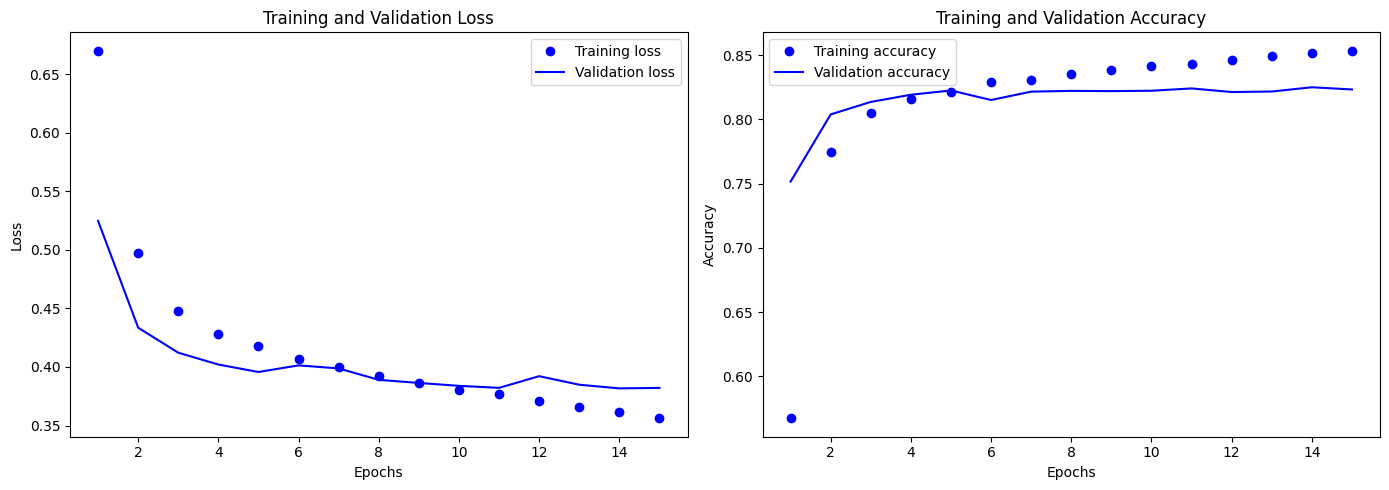

In [37]:
plt_check(history_model_A)

### **5) 테스트 데이터 확인**

In [38]:
# 테스트 데이터 정확도, Loss 확인
def model_test(model, test_loader):
    model.eval()
    test_loss = 0.0
    test_correct = 0
    test_total = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), labels)
    
            test_loss += loss.item()
            predicted = (outputs.squeeze() > 0.5).float()
            test_correct += (predicted == labels).sum().item()
            test_total += labels.size(0)
    
    print(f"Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_correct / test_total:.4f}")

In [39]:
test_dataset = TensorDataset(x_test_tensor, torch.tensor(y_test, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

print("model_A")
model_test(model_A, test_loader)

model_A
Test Loss: 0.3930, Test Accuracy: 0.8253


## **`<pad>` 특수 토큰 적용 하여 다시 학습**

### **1) SentencePiece 모델 학습**

In [40]:
# import sentencepiece as spm
# import os
# temp_file = 'korean-english-park_2.train.ko.temp'

# vocab_size = 8000

# with open(temp_file, 'w') as f:
#     for row in filtered_corpus:   # 이전에 나왔던 정제했던 corpus를 활용해서 진행해야 합니다.
#         f.write(str(row) + '\n')

# spm.SentencePieceTrainer.Train(
#     '--input={} --model_prefix=korean_spm_2 --vocab_size={} --pad_id=0 --unk_id=1 --bos_id=2 --eos_id=3'.format(temp_file, vocab_size)    
# )
# #위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

# !ls -l korean_spm_2*

In [41]:
s2 = spm.SentencePieceProcessor()
# SentencePiece 모델 객체 생성

s2.Load('korean_spm_2.model')
# 아까 학습한 파일을 메모리로 불러옴
# 이제 이 객체는 “한국어용 서브워드 규칙”을 가짐

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s2.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s2.SampleEncodeAsPieces('아버지가방에들어가신다.',-1, 0.1))
# 확률적으로 토큰화 하는 방식
# -1 : 모든 후보 고려
# 0.1 : 랜덤성 강

# SentencePiece를 활용한 encoding -> sentence 복원
print(s2.DecodeIds(tokensIDs))

[1247, 12, 303, 8, 3542, 12, 288, 34, 5]
['▁', '아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


### **2) Tokenizer 함수 작성**

In [42]:
def sp_tokenize_2(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    ##### 추가 #####
    tensor = [
        torch.tensor(seq, dtype=torch.long)
        for seq in tensor
    ]
    ################
    
    with open("./korean_spm_2.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})
    
    tensor = pad_sequence(tensor, batch_first=True, padding_value=0)

    return tensor, word_index, index_word

### **3) 새로운 토크나이저 적용**

In [43]:
x_train_tensor, word_index, index_word = sp_tokenize_2(s2, train_data['document'].tolist())
x_test_tensor, _, _ = sp_tokenize_2(s2, test_data['document'].tolist())

y_train = np.array(list(train_data['label']))
y_test = np.array(list(test_data['label']))

lengths = [len(s2.EncodeAsIds(sen)) for sen in train_data['document']]
maxlen = max(lengths)

print(x_train_tensor.shape)
print(x_test_tensor.shape)
print(y_train.shape)
print(y_test.shape)
print(maxlen)

torch.Size([150000, 140])
torch.Size([50000, 140])
(150000,)
(50000,)
140


In [44]:
# validation set 10000건 분리
x_val = x_train_tensor[:10000]
y_val = y_train[:10000]

# validation set을 제외한 나머지
partial_x_train = x_train_tensor[10000:]
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

torch.Size([140000, 140])
(140000,)


In [45]:
# 1. NumPy → Torch Tensor 변환
partial_x_train_tensor = torch.tensor(partial_x_train, dtype=torch.long)
# partial_x_train_tensor = partial_x_train.long()
partial_y_train_tensor = torch.tensor(partial_y_train, dtype=torch.float)

x_val_tensor = torch.tensor(x_val, dtype=torch.long)
# x_val_tensor = x_val.long()
y_val_tensor = torch.tensor(y_val, dtype=torch.float)

# 2. Dataset, Dataloader 생성
train_dataset = TensorDataset(partial_x_train_tensor, partial_y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False)

/tmp/ipykernel_4338/2183133270.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  partial_x_train_tensor = torch.tensor(partial_x_train, dtype=torch.long)
/tmp/ipykernel_4338/2183133270.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_val_tensor = torch.tensor(x_val, dtype=torch.long)


### **4) Decode 확인**

In [46]:
print(train_data['document'][1])

흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나


In [47]:
ids = x_train_tensor[1].tolist()

decoded = s2.DecodeIds(ids)

print(decoded)

흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나


In [48]:
print(s2.IdToPiece(ids))
print(len(s2.IdToPiece(ids)))

['▁', '흠', '.', '.', '.', '포', '스터', '보', '고', '▁초', '딩', '영화', '줄', '.', '.', '.', '.', '오', '버', '연', '기', '조차', '▁', '가', '볍', '지', '▁않', '구', '나', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<p

In [49]:
print(len(index_word))

for i in range(10):
    print(index_word[i])

8000
<pad>
<unk>
<s>
</s>
▁
.
을
의
에
이


In [50]:
model_B = SentimentModel_word2vec(vocab_size, word_vector_dim, embedding_matrix, maxlen)
print(model_B)

SentimentModel_word2vec(
  (embedding): Embedding(8000, 16)
  (conv1): Conv1d(16, 16, kernel_size=(7,), stride=(1,))
  (pool): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(16, 16, kernel_size=(7,), stride=(1,))
  (global_max_pool): AdaptiveMaxPool1d(output_size=1)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=16, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)


In [51]:
# 3. 옵티마이저와 손실함수 정의
optimizer_B = optim.Adam(model_B.parameters(), lr=1e-3)
loss_fn = torch.nn.BCELoss()
# BCELoss : Binary Cross Entropy Loss, sigmoid 출력(0~1)과 정답(0/1)을 비교하는 이진 분류용 손실함수

In [52]:
history_model_B = train_one_model(
    model=model_B,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer_B,
    loss_fn=loss_fn,
    epochs=15
)

Epoch 1/15 - Train Loss: 0.6534, Train Accuracy: 0.5996 - Validation Loss: 0.5140, Validation Accuracy: 0.7648
Epoch 2/15 - Train Loss: 0.4997, Train Accuracy: 0.7786 - Validation Loss: 0.4330, Validation Accuracy: 0.8038
Epoch 3/15 - Train Loss: 0.4541, Train Accuracy: 0.8063 - Validation Loss: 0.4086, Validation Accuracy: 0.8156
Epoch 4/15 - Train Loss: 0.4370, Train Accuracy: 0.8152 - Validation Loss: 0.4057, Validation Accuracy: 0.8172
Epoch 5/15 - Train Loss: 0.4272, Train Accuracy: 0.8196 - Validation Loss: 0.3950, Validation Accuracy: 0.8227
Epoch 6/15 - Train Loss: 0.4152, Train Accuracy: 0.8245 - Validation Loss: 0.3909, Validation Accuracy: 0.8225
Epoch 7/15 - Train Loss: 0.4088, Train Accuracy: 0.8272 - Validation Loss: 0.3906, Validation Accuracy: 0.8246
Epoch 8/15 - Train Loss: 0.4004, Train Accuracy: 0.8308 - Validation Loss: 0.3891, Validation Accuracy: 0.8250
Epoch 9/15 - Train Loss: 0.3917, Train Accuracy: 0.8348 - Validation Loss: 0.3869, Validation Accuracy: 0.8269
E

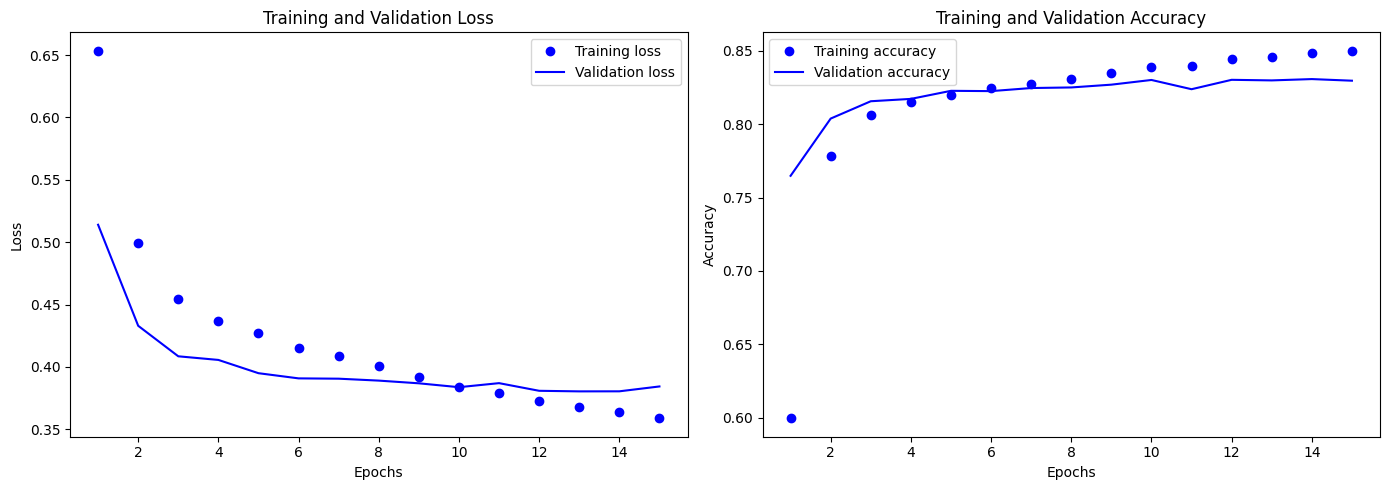

In [53]:
plt_check(history_model_B)

In [54]:
test_dataset = TensorDataset(x_test_tensor, torch.tensor(y_test, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

print("model_B")
model_test(model_B, test_loader)

model_B
Test Loss: 0.3936, Test Accuracy: 0.8291


## **Mecab** 적용해보기

In [55]:
from konlpy.tag import Mecab
mecab = Mecab()

In [56]:
from konlpy.tag import Mecab

mecab = Mecab()

def tokenize_mecab(texts):
    tokenized = []
    for sent in texts:
        tokens = mecab.morphs(sent)
        tokenized.append(tokens)
    return tokenized

In [57]:
tokenized_train = tokenize_mecab(train_data["document"])
tokenized_test  = tokenize_mecab(test_data["document"])

In [58]:
print(tokenized_train[0:10])

[['아', '더', '빙', '.', '.', '진짜', '짜증', '나', '네요', '목소리'], ['흠', '.', '..', '포스터', '보고', '초딩', '영화', '줄', '.', '...', '오버', '연기', '조차', '가볍', '지', '않', '구나'], ['너무', '재', '밓었다그래서보는것을추천한다'], ['교도소', '이야기', '구먼', '.', '.', '솔직히', '재미', '는', '없', '다', '.', '.', '평점', '조정'], ['사이몬페그', '의', '익살', '스런', '연기', '가', '돋보였', '던', '영화', '!', '스파이더맨', '에서', '늙', '어', '보이', '기', '만', '했', '던', '커스틴', '던스트', '가', '너무나', '도', '이뻐', '보였', '다'], ['막', '걸음마', '뗀', '3', '세', '부터', '초등', '학교', '1', '학년', '생', '인', '8', '살', '용', '영화', '.', 'ㅋㅋㅋ', '.', '..', '별반', '개', '도', '아까움', '.'], ['원작', '의', '긴장감', '을', '제대로', '살려', '내', '지', '못했', '다', '.'], ['별', '반개', '도', '아깝', '다', '욕', '나온다', '이응경', '길용우', '연기', '생활', '이', '몇', '년', '인지', '.', '.', '정말', '발', '로', '해도', '그것', '보단', '낫', '겟', '다', '납치', '.', '감금', '만', '반복', '반복', '.', '.', '이', '드라마', '는', '가족', '도', '없', '다', '연기', '못', '하', '는', '사람', '만', '모엿', '네'], ['액션', '이', '없', '는데', '도', '재미', '있', '는', '몇', '안', '되', '는', '영화'], ['왜', '케', '평점', '이',

In [59]:
from collections import Counter

def build_vocab(tokenized, min_freq=2):  # 2개 이상 등장한 토큰만 단어장에 넣을 것임
    counter = Counter()

    for tokens in tokenized:
        counter.update(tokens)

    # 특수 토큰
    vocab = ["<pad>", "<unk>"]

    # 최소 등장 횟수 필터
    for word, freq in counter.items():
        if freq >= min_freq:
            vocab.append(word)

    word_index = {w:i for i,w in enumerate(vocab)}
    index_word = {i:w for i,w in enumerate(vocab)}

    return word_index, index_word

In [60]:
word_index, index_word = build_vocab(tokenized_train)

In [61]:
print(len(word_index))
print(len(index_word))

30149
30149


In [62]:
def encode(tokenized, word_index):
    encoded = []

    unk_id = word_index["<unk>"]

    for tokens in tokenized:
        ids = []
        for w in tokens:
            ids.append(word_index.get(w, unk_id))
        encoded.append(ids)

    return encoded


In [63]:
encoded_train = encode(tokenized_train, word_index)
encoded_test  = encode(tokenized_test, word_index)

In [64]:
def make_tensor(encoded, pad_id=0):

    tensors = [
        torch.tensor(seq, dtype=torch.long)
        for seq in encoded
    ]

    padded = pad_sequence(
        tensors,
        batch_first=True,
        padding_value=pad_id
    )

    return padded


In [65]:
def pad_to_maxlen(seqs, maxlen, pad_id=0):
    out = []
    for s in seqs:
        if len(s) >= maxlen:
            s = s[:maxlen]
        else:
            s = s + [pad_id] * (maxlen - len(s))
        out.append(torch.tensor(s))
    return torch.stack(out)

In [66]:
maxlen = max(len(x) for x in encoded_train)

x_train_tensor = pad_to_maxlen(encoded_train, maxlen)
x_test_tensor  = pad_to_maxlen(encoded_test,  maxlen)

In [67]:
print(x_train_tensor.shape)
print(x_test_tensor.shape)

torch.Size([150000, 116])
torch.Size([50000, 116])


In [68]:
# validation set 10000건 분리
x_val = x_train_tensor[:10000]
y_val = y_train[:10000]

# validation set을 제외한 나머지
partial_x_train = x_train_tensor[10000:]
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

torch.Size([140000, 116])
(140000,)


In [69]:
# 1. NumPy → Torch Tensor 변환
partial_x_train_tensor = torch.tensor(partial_x_train, dtype=torch.long)
# partial_x_train_tensor = partial_x_train.long()
partial_y_train_tensor = torch.tensor(partial_y_train, dtype=torch.float)

x_val_tensor = torch.tensor(x_val, dtype=torch.long)
# x_val_tensor = x_val.long()
y_val_tensor = torch.tensor(y_val, dtype=torch.float)

# 2. Dataset, Dataloader 생성
train_dataset = TensorDataset(partial_x_train_tensor, partial_y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False)

/tmp/ipykernel_4338/2183133270.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  partial_x_train_tensor = torch.tensor(partial_x_train, dtype=torch.long)
/tmp/ipykernel_4338/2183133270.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_val_tensor = torch.tensor(x_val, dtype=torch.long)


In [70]:
ids = x_train_tensor[1].tolist()

decoded = ""
for i in ids:
    if i == 0:
        continue
    else:
        decoded += index_word[i]

print(decoded)

흠...포스터보고초딩영화줄....오버연기조차가볍지않구나


In [71]:
model_C = SentimentModel_word2vec(vocab_size, word_vector_dim, embedding_matrix, maxlen)
print(model_C)

SentimentModel_word2vec(
  (embedding): Embedding(8000, 16)
  (conv1): Conv1d(16, 16, kernel_size=(7,), stride=(1,))
  (pool): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(16, 16, kernel_size=(7,), stride=(1,))
  (global_max_pool): AdaptiveMaxPool1d(output_size=1)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=16, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)


In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SentimentModel_word2vec_C(nn.Module):
    def __init__(self, vocab_size, word_vector_dim, embedding_matrix, maxlen, dropout=0.3):
        super(SentimentModel_word2vec_C, self).__init__()
        self.embedding = nn.Embedding(vocab_size, word_vector_dim)    # 카피한 임베딩을 여기서 활용
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = True
        self.conv1 = nn.Conv1d(in_channels=word_vector_dim, out_channels=16, kernel_size=7)
        self.pool = nn.MaxPool1d(kernel_size=5)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=16, kernel_size=7)
        self.global_max_pool = nn.AdaptiveMaxPool1d(1)
        self.dropout = nn.Dropout(dropout)  # 드롭아웃 추가
        self.fc1 = nn.Linear(16, 8)
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.global_max_pool(x).squeeze(2)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        return x

In [73]:
vocab_size = 30149    # 어휘 사전의 크기입니다(8,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원수

embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(2,vocab_size):  # 0 ~ 1 index가 특수 토큰이라 2 적음
    if index_word[i] in vector:
        embedding_matrix[i] = vector[index_word[i]]

In [74]:
model_C = SentimentModel_word2vec_C(vocab_size, word_vector_dim, embedding_matrix, maxlen)
print(model_C)

SentimentModel_word2vec_C(
  (embedding): Embedding(30149, 16)
  (conv1): Conv1d(16, 16, kernel_size=(7,), stride=(1,))
  (pool): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(16, 16, kernel_size=(7,), stride=(1,))
  (global_max_pool): AdaptiveMaxPool1d(output_size=1)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=16, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)


In [75]:
# 3. 옵티마이저와 손실함수 정의
optimizer_C = optim.Adam(model_C.parameters(), lr=1e-3)
loss_fn = torch.nn.BCELoss()
# BCELoss : Binary Cross Entropy Loss, sigmoid 출력(0~1)과 정답(0/1)을 비교하는 이진 분류용 손실함수

In [76]:
history_model_C = train_one_model(
    model=model_C,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer_C,
    loss_fn=loss_fn,
    epochs=15
)

Epoch 1/15 - Train Loss: 0.6749, Train Accuracy: 0.5568 - Validation Loss: 0.5292, Validation Accuracy: 0.7557
Epoch 2/15 - Train Loss: 0.4741, Train Accuracy: 0.7946 - Validation Loss: 0.3940, Validation Accuracy: 0.8234
Epoch 3/15 - Train Loss: 0.3975, Train Accuracy: 0.8396 - Validation Loss: 0.3678, Validation Accuracy: 0.8360
Epoch 4/15 - Train Loss: 0.3672, Train Accuracy: 0.8575 - Validation Loss: 0.3548, Validation Accuracy: 0.8411
Epoch 5/15 - Train Loss: 0.3441, Train Accuracy: 0.8692 - Validation Loss: 0.3519, Validation Accuracy: 0.8464
Epoch 6/15 - Train Loss: 0.3304, Train Accuracy: 0.8758 - Validation Loss: 0.3560, Validation Accuracy: 0.8416
Epoch 7/15 - Train Loss: 0.3140, Train Accuracy: 0.8836 - Validation Loss: 0.3543, Validation Accuracy: 0.8504
Epoch 8/15 - Train Loss: 0.3012, Train Accuracy: 0.8891 - Validation Loss: 0.3568, Validation Accuracy: 0.8496
Epoch 9/15 - Train Loss: 0.2897, Train Accuracy: 0.8953 - Validation Loss: 0.3790, Validation Accuracy: 0.8409
E

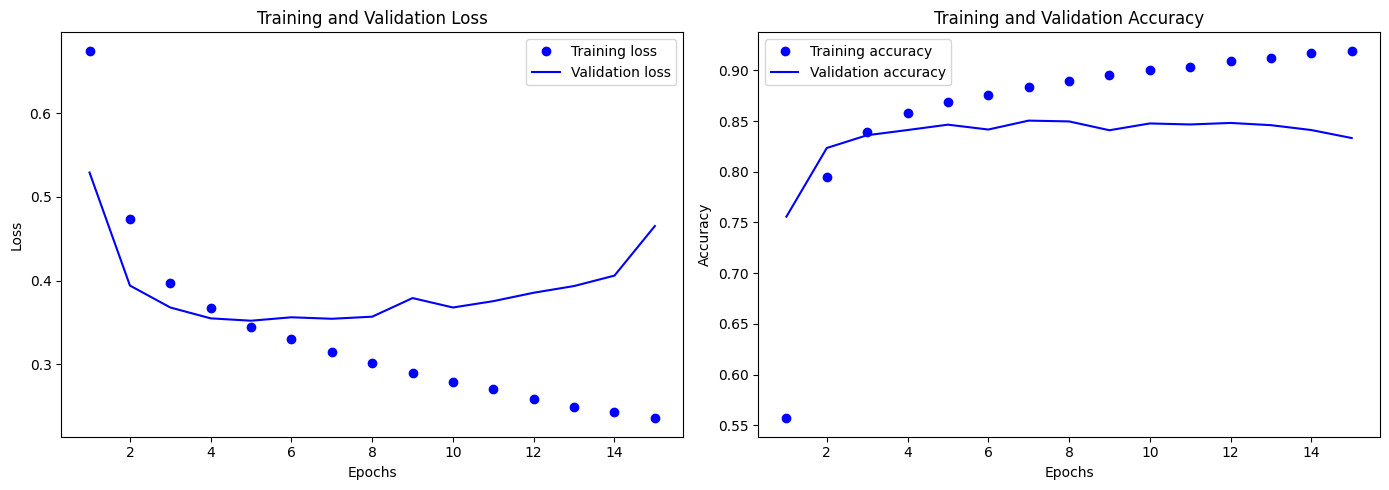

In [77]:
plt_check(history_model_C)

In [78]:
test_dataset = TensorDataset(x_test_tensor, torch.tensor(y_test, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

print("model_C")
model_test(model_C, test_loader)

model_C
Test Loss: 0.4760, Test Accuracy: 0.8296


## **결과 해석 및 회고**

### **실험결과**
- TextCNN 모델을 사용했고, Sentence Piece, Mecab 토크나이저를 테스트 했음

<br>

- **첫 번째 실험** : Sentence Piece 사용
  - 결과 : Test Loss: 0.3930, Test Accuracy: 0.8253
  - 해석
    - Loss가 크게 튀는 부분 없이 안정적으로 학습됨
    - 토크나이저 적용 및 모델 구현은 잘 진행된듯
  - 문제점 및 해결방안
    - Sentence Piece를 따로 옵션을 지정해주지 않으면 vocab에 `<PAD>` 토큰이 추가되지 않음
    - 짧은 문장이라 하더라도 `<PAD>`가 아닌 `<UNK>` 토큰으로 채워져 벡터가 0이 아닌 값으로 채워지면 Noise가 증가할 수 있다고함

<br>

- **두 번째 실험** : Sentence Piece 토크나이저 `<PAD>` 옵션 지정하여 재학습 후 다시 적용해보기
  - 결과 : Test Loss: 0.3936, Test Accuracy: 0.8291
  - 해석
    - `<PAD>`를 적용시켜보았으나 약간 정확도가 오르긴 했지만, 크게 증가하지 않음
    - 이부분은 단지 학습 과정에서의 Noise를 줄이는 것뿐이라 큰 차이가 없는 게 맞을듯

<br>

- **세 번째 실험** : Mecab 토크나이저 적용해보기
  - 결과 : Test Loss: 0.4760, Test Accuracy: 0.8296
  - 해석 :
    - 정확도는 크게 차이가 없으나 8epoch 즈음부터 Loss가 증가함
    - 과적합 된 것 같음
  - 문제점 및 해결방안
    - 너무 작은 파라미터로 시작한 것 같음. 임베딩 차원(16 → 100정도?)을 좀 더 늘려도 될듯
    - learning rate를 조절하는 것도 방법일듯
    - epoch을 줄이거나 early stopping 기법을 적용해도 좋을 것 같다

<br>

### **회고**
- 과정을 쭉 다시 되돌아보니 데이터 전처리 과정이 없었다... NaN 값 제거뿐만이 아니라 평균과 표준편차로 문장 최대 길이를 제한한다거나, 중복 데이터를 제거한다거나... 
- 모델을 TextCNN을 쓰긴 했지만, LSTM을 쓰면 정확도가 더 올라갈 수 있을 것 같다.
- ChatGPT에 물어보니, 한국어 대상으로 감성분류를 할 때는 Mecab이 더 유리할 수 있다고 한다. Sentence Piece는 신조어, 오타, 희귀어 등의 케이스에 더 적합하다고 하는데, 리뷰 데이터를 더 뜯어봐야겠지만, 생각보다 사람들이 오타나 신조어 같은 예외사항 없이 글을 잘 써준 걸지도?